In [ ]:
#https://finance.yahoo.com › quote › ETH-BTC
#ETH-BTC - Ethereum B                                     data set use

ETH-BTC

In [3]:
!pip install tensorflow
!pip install keras

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import datetime

In [19]:
from sklearn.metrics import mean_squared_error
from keras.layers.core import Dense, Activation, Dropout
from keras.layers import LSTM, Dense
from keras.models import Sequential
from sklearn.preprocessing import MinMaxScaler

In [8]:
data = pd.read_csv("/content/ETH-BTC.csv")

In [9]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-09-12,0.029334,0.029328,0.027160,0.028863,0.028863,295168.0
1,2018-09-13,0.028918,0.032864,0.028907,0.032430,0.032430,357620.0
2,2018-09-14,0.032631,0.033908,0.031698,0.032513,0.032513,342744.0
3,2018-09-15,0.032216,0.034607,0.032234,0.034092,0.034092,255302.0
4,2018-09-16,0.034051,0.034085,0.032549,0.033847,0.033847,230508.0


In [33]:
data.isnull().sum()

Date         0
Open         1
High         1
Low          1
Close        1
Adj Close    1
Volume       1
dtype: int64

In [35]:
data = data.dropna()

In [36]:
prices = data['Close'].values.reshape(-1, 1)

In [37]:
#prices

In [38]:
# Normalize the data using Min-Max scaling
scaler = MinMaxScaler()
prices_scaled = scaler.fit_transform(prices)

In [39]:
#prices_scaled

In [40]:
# Define a function to create sequences for LSTM
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)

In [41]:
# Define hyperparameters
sequence_length = 10  # Adjust as needed
train_size = int(len(prices_scaled) * 0.8)
test_size = len(prices_scaled) - train_size

In [42]:
# Create train and test datasets
X_train, y_train = create_sequences(prices_scaled[:train_size], sequence_length)
X_test, y_test = create_sequences(prices_scaled[train_size:], sequence_length)


In [43]:
# Build the LSTM model
model = Sequential()
model.add(LSTM(units=50, activation='relu', input_shape=(sequence_length, 1)))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')

In [95]:
#X_train

In [45]:
# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32)

Epoch 1/50
46/46 [==============================] - 3s 12ms/step - loss: 0.0742
Epoch 2/50
46/46 [==============================] - 1s 11ms/step - loss: 0.0022
Epoch 3/50
46/46 [==============================] - 1s 13ms/step - loss: 0.0014
Epoch 4/50
46/46 [==============================] - 0s 9ms/step - loss: 0.0013
Epoch 5/50
46/46 [==============================] - 0s 8ms/step - loss: 0.0012
Epoch 6/50
46/46 [==============================] - 0s 8ms/step - loss: 0.0012
Epoch 7/50
46/46 [==============================] - 0s 7ms/step - loss: 0.0010
Epoch 8/50
46/46 [==============================] - 0s 8ms/step - loss: 9.9355e-04
Epoch 9/50
46/46 [==============================] - 0s 7ms/step - loss: 9.7841e-04
Epoch 10/50
46/46 [==============================] - 0s 8ms/step - loss: 9.3605e-04
Epoch 11/50
46/46 [==============================] - 0s 8ms/step - loss: 0.0010
Epoch 12/50
46/46 [==============================] - 0s 7ms/step - loss: 8.7601e-04
Epoch 13/50
46/46 [===========

In [46]:
# Evaluate the model on the test data
test_loss = model.evaluate(X_test, y_test)
print(f'Test Loss: {test_loss}')

12/12 [==============================] - 0s 3ms/step - loss: 2.2617e-04
Test Loss: 0.0002261661138618365


In [47]:
# Make predictions on the test data
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)

12/12 [==============================] - 0s 3ms/step


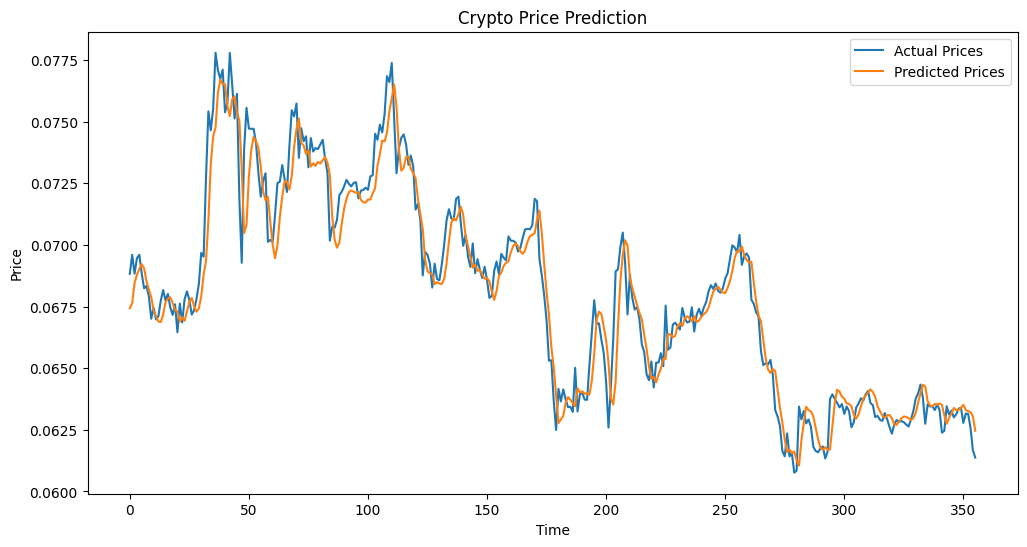

In [48]:
# Plot the actual vs. predicted prices
plt.figure(figsize=(12, 6))
plt.plot(prices[train_size+sequence_length:], label='Actual Prices')
plt.plot(predictions, label='Predicted Prices')
plt.legend()
plt.title('Crypto Price Prediction')
plt.xlabel('Time')
plt.ylabel('Price')
plt.show()

Predict Next day Closing


In [51]:
from sklearn.metrics import mean_squared_error
from math import sqrt

In [49]:
# Make predictions on the test data
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)

12/12 [==============================] - 0s 3ms/step


In [52]:
# Calculate RMSE (Root Mean Squared Error) as a metric
rmse = sqrt(mean_squared_error(scaler.inverse_transform(y_test), predictions))
print(f'RMSE: {rmse}')

RMSE: 0.001075035122369855


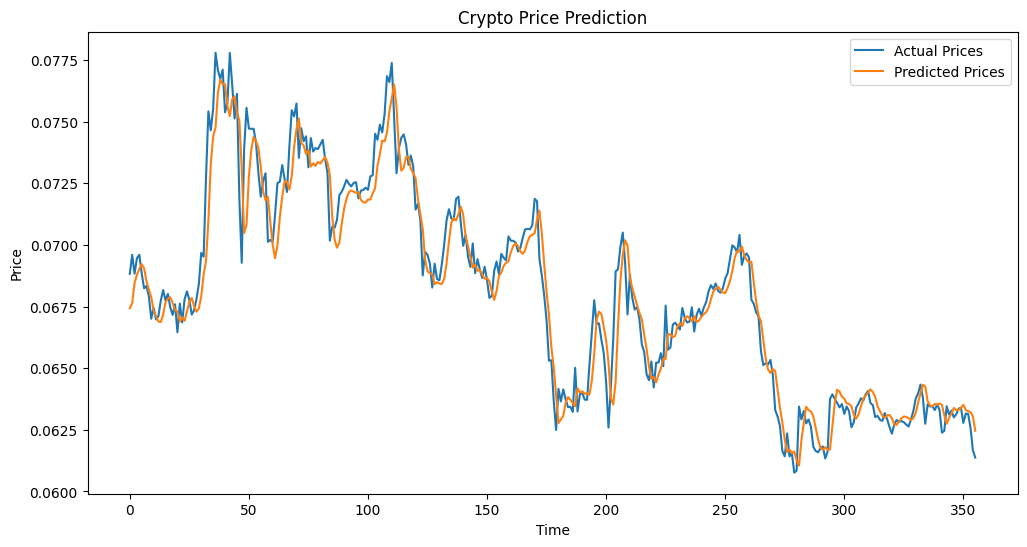

In [53]:
# Plot the actual vs. predicted prices
plt.figure(figsize=(12, 6))
plt.plot(scaler.inverse_transform(y_test), label='Actual Prices')
plt.plot(predictions, label='Predicted Prices')
plt.legend()
plt.title('Crypto Price Prediction')
plt.xlabel('Time')
plt.ylabel('Price')
plt.show()

In [54]:
# Predict the next day's close price
last_sequence = prices_scaled[-sequence_length:].reshape(1, sequence_length, 1)
next_day_prediction = model.predict(last_sequence)
next_day_price = scaler.inverse_transform(next_day_prediction)
print(f'Predicted Next Day Close Price: {next_day_price[0][0]}')

1/1 [==============================] - 0s 23ms/step
Predicted Next Day Close Price: 0.06185344606637955


In [58]:
# Make predictions on the test data
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)

12/12 [==============================] - 0s 3ms/step


In [59]:
# Calculate RMSE (Root Mean Squared Error) as a metric
rmse = sqrt(mean_squared_error(scaler.inverse_transform(y_test), predictions))
print(f'RMSE: {rmse}')

RMSE: 0.001075035122369855


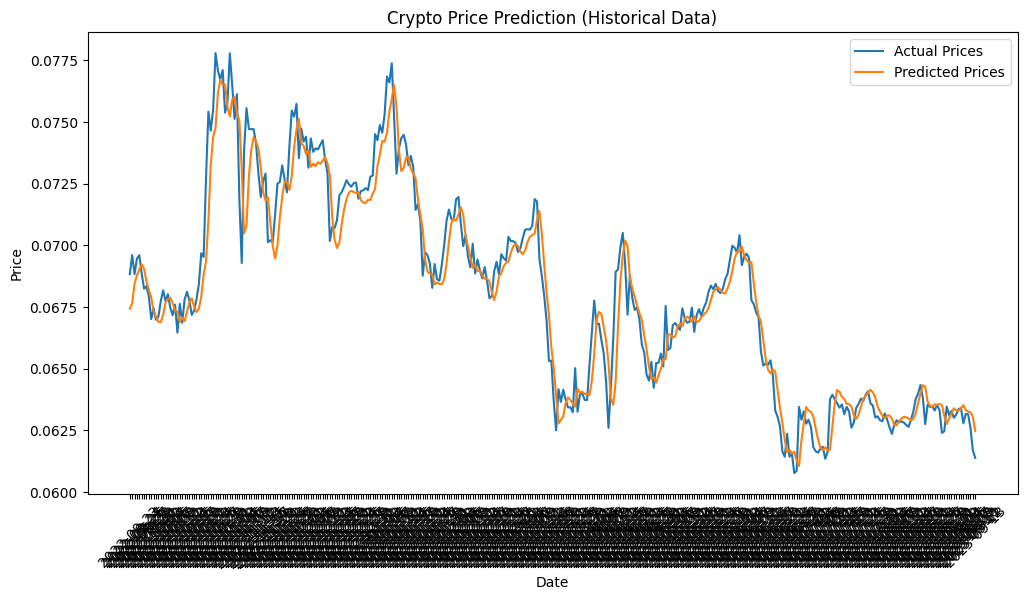

In [60]:
# Plot the historical data with date labels
plt.figure(figsize=(12, 6))
plt.plot(dates[-len(y_test):], scaler.inverse_transform(y_test), label='Actual Prices')
plt.plot(dates[-len(y_test):], predictions, label='Predicted Prices')
plt.legend()
plt.title('Crypto Price Prediction (Historical Data)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.xticks(rotation=45)  # Rotate x-axis labels for readability
plt.show()

In [62]:
# Predict the next 15 days of close prices
next_days_predictions = []
last_sequence = prices_scaled[-sequence_length:].reshape(1, sequence_length, 1)
for _ in range(15):
    next_day_prediction = model.predict(last_sequence)
    next_days_predictions.append(next_day_prediction[0][0])
    last_sequence = np.append(last_sequence[:, 1:, :], next_day_prediction.reshape(1, 1, 1), axis=1)


1/1 [==============================] - 0s 24ms/step


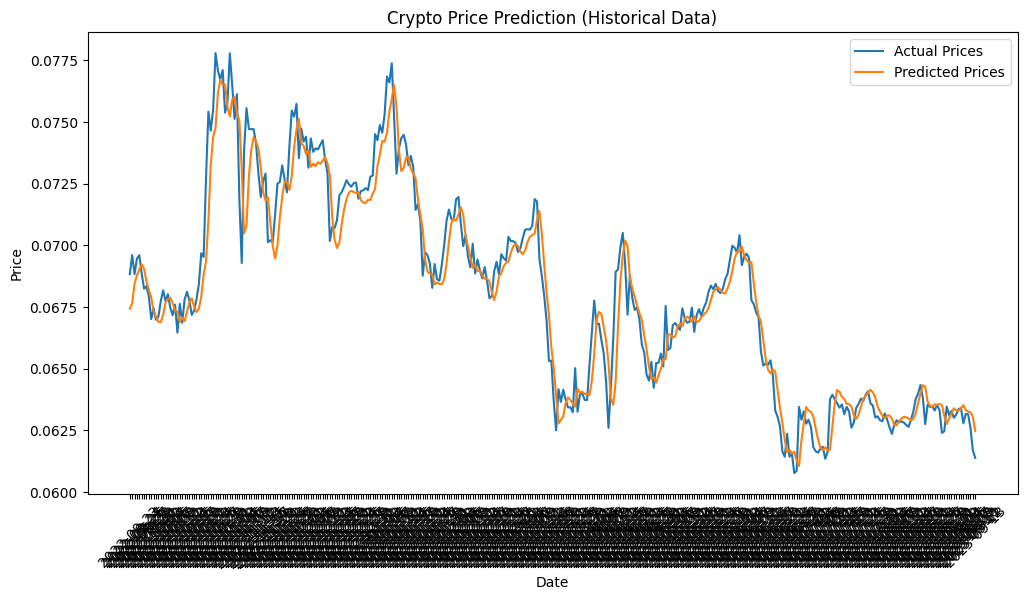

In [65]:
# Plot the historical data with date labels
plt.figure(figsize=(12, 6))
plt.plot(dates[-len(y_test):], scaler.inverse_transform(y_test), label='Actual Prices')
plt.plot(dates[-len(y_test):], predictions, label='Predicted Prices')
plt.legend()
plt.title('Crypto Price Prediction (Historical Data)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.xticks(rotation=45)  # Rotate x-axis labels for readability
plt.show()

In [73]:
# Predict the next 15 days of close prices
next_days_predictions = []
last_sequence = prices_scaled[-sequence_length:].reshape(1, sequence_length, 1)
for _ in range(15):
    next_day_prediction = model.predict(last_sequence)
    next_days_predictions.append(next_day_prediction[0][0])
    last_sequence = np.append(last_sequence[:, 1:, :], next_day_prediction.reshape(1, 1, 1), axis=1)

1/1 [==============================] - 0s 23ms/step


In [77]:
# Print the predicted values for the next 15 days
for i, prediction in enumerate(next_days_predictions, start=1):
    print(f'Day {i}: Predicted Close Price: {scaler.inverse_transform(np.array([prediction]).reshape(-1, 1))[0][0]}')

Day 1: Predicted Close Price: 0.061616506427526474
Day 2: Predicted Close Price: 0.06172952055931091
Day 3: Predicted Close Price: 0.06193714961409569
Day 4: Predicted Close Price: 0.062171004712581635
Day 5: Predicted Close Price: 0.06241025775671005
Day 6: Predicted Close Price: 0.06266375631093979
Day 7: Predicted Close Price: 0.06292640417814255
Day 8: Predicted Close Price: 0.0632006973028183
Day 9: Predicted Close Price: 0.06348168849945068
Day 10: Predicted Close Price: 0.06376057863235474
Day 11: Predicted Close Price: 0.06403663754463196
Day 12: Predicted Close Price: 0.06430862098932266
Day 13: Predicted Close Price: 0.06457575410604477
Day 14: Predicted Close Price: 0.06483805924654007
Day 15: Predicted Close Price: 0.0650954470038414


In [67]:
# Create dates for the next 15 days
next_days_dates = pd.date_range(start=dates[-1], periods=16, closed='right')

<ipython-input-67-3d91b5537c10>:2: FutureWarning: Argument `closed` is deprecated in favor of `inclusive`.
  next_days_dates = pd.date_range(start=dates[-1], periods=16, closed='right')


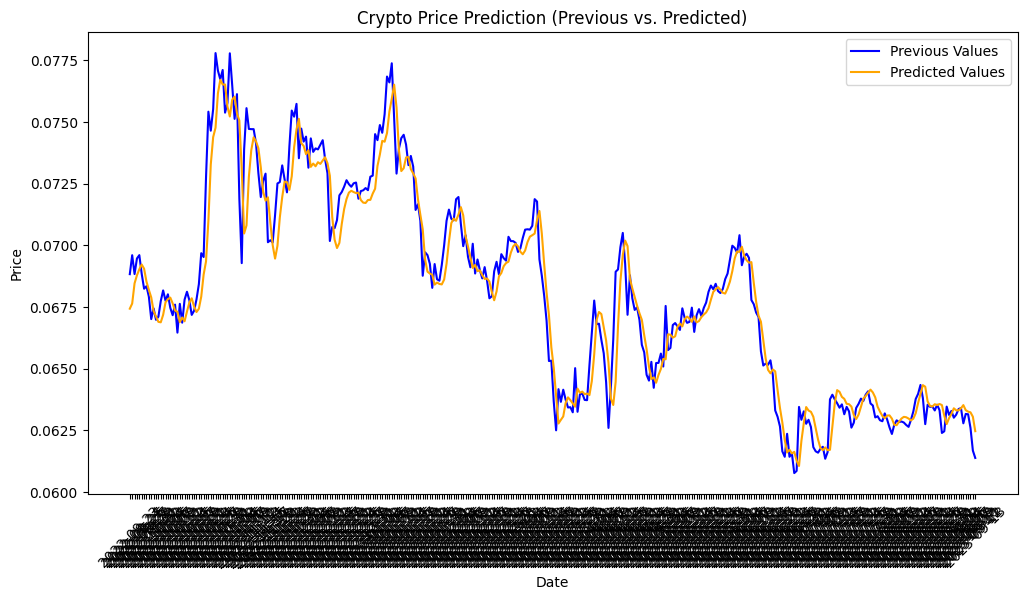

In [71]:
# Plot the historical data with previous values in a suitable color and predicted values in another suitable color
plt.figure(figsize=(12, 6))
plt.plot(dates[-len(y_test):], scaler.inverse_transform(y_test), label='Previous Values', color='blue')
plt.plot(dates[-len(y_test):], predictions, label='Predicted Values', color='orange')
plt.legend()
plt.title('Crypto Price Prediction (Previous vs. Predicted)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.xticks(rotation=45)  # Rotate x-axis labels for readability
plt.show()


ETH-BTC

In [78]:
data = pd.read_csv("/content/ETH-BTC.csv")

In [79]:
data.isnull().sum()

Date         0
Open         1
High         1
Low          1
Close        1
Adj Close    1
Volume       1
dtype: int64

In [80]:
data = data.dropna()

In [81]:
prices = data['Close'].values.reshape(-1, 1)

In [82]:
# Normalize the data using Min-Max scaling
scaler = MinMaxScaler()
prices_scaled = scaler.fit_transform(prices)

In [83]:
# Define a function to create sequences for LSTM
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)

In [84]:
# Define hyperparameters
sequence_length = 10  # Adjust as needed
train_size = int(len(prices_scaled) * 0.8)
test_size = len(prices_scaled) - train_size

In [85]:
# Create train and test datasets
X_train, y_train = create_sequences(prices_scaled[:train_size], sequence_length)
X_test, y_test = create_sequences(prices_scaled[train_size:], sequence_length)


In [86]:
# Build the LSTM model
model = Sequential()
model.add(LSTM(units=50, activation='relu', input_shape=(sequence_length, 1)))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')

In [87]:
# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32)

Epoch 1/50
46/46 [==============================] - 3s 8ms/step - loss: 0.0842
Epoch 2/50
46/46 [==============================] - 0s 8ms/step - loss: 0.0018
Epoch 3/50
46/46 [==============================] - 0s 8ms/step - loss: 0.0013
Epoch 4/50
46/46 [==============================] - 0s 8ms/step - loss: 0.0012
Epoch 5/50
46/46 [==============================] - 0s 8ms/step - loss: 0.0011
Epoch 6/50
46/46 [==============================] - 0s 8ms/step - loss: 0.0011
Epoch 7/50
46/46 [==============================] - 0s 10ms/step - loss: 0.0010
Epoch 8/50
46/46 [==============================] - 1s 12ms/step - loss: 9.7869e-04
Epoch 9/50
46/46 [==============================] - 1s 12ms/step - loss: 9.2286e-04
Epoch 10/50
46/46 [==============================] - 1s 13ms/step - loss: 9.8405e-04
Epoch 11/50
46/46 [==============================] - 1s 13ms/step - loss: 8.5558e-04
Epoch 12/50
46/46 [==============================] - 1s 12ms/step - loss: 8.8793e-04
Epoch 13/50
46/46 [====

In [88]:
# Evaluate the model on the test data
test_loss = model.evaluate(X_test, y_test)
print(f'Test Loss: {test_loss}')

12/12 [==============================] - 0s 4ms/step - loss: 4.3731e-04
Test Loss: 0.00043730789911933243


In [89]:
# Make predictions on the test data
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)

12/12 [==============================] - 0s 4ms/step


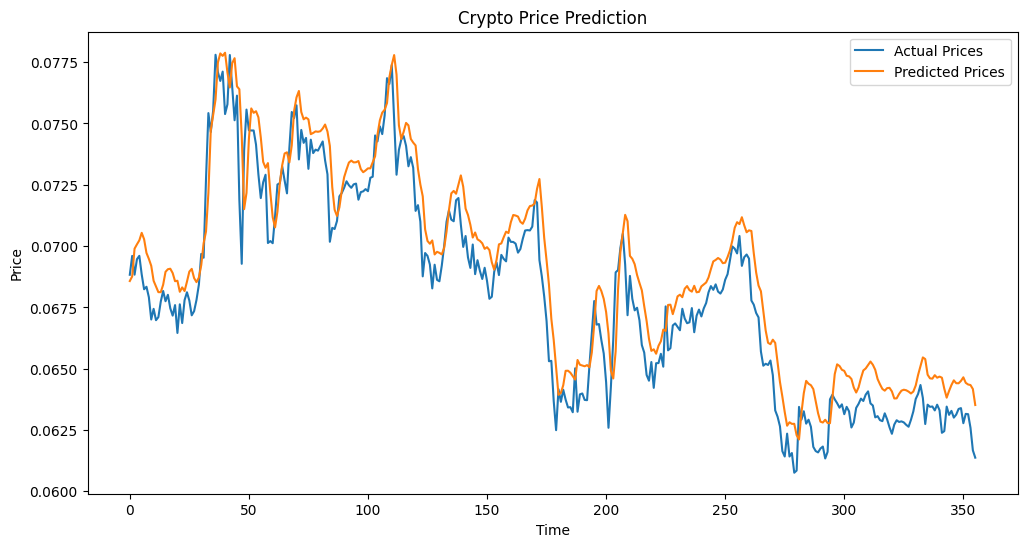

In [90]:
# Plot the actual vs. predicted prices
plt.figure(figsize=(12, 6))
plt.plot(prices[train_size+sequence_length:], label='Actual Prices')
plt.plot(predictions, label='Predicted Prices')
plt.legend()
plt.title('Crypto Price Prediction')
plt.xlabel('Time')
plt.ylabel('Price')
plt.show()

In [91]:
# Predict the next 15 days of close prices
next_days_predictions = []
last_sequence = prices_scaled[-sequence_length:].reshape(1, sequence_length, 1)
for _ in range(15):
    next_day_prediction = model.predict(last_sequence)
    next_days_predictions.append(next_day_prediction[0][0])
    last_sequence = np.append(last_sequence[:, 1:, :], next_day_prediction.reshape(1, 1, 1), axis=1)

1/1 [==============================] - 0s 41ms/step


In [92]:
# Print the predicted values for the next 15 days
for i, prediction in enumerate(next_days_predictions, start=1):
    print(f'Day {i}: Predicted Close Price: {scaler.inverse_transform(np.array([prediction]).reshape(-1, 1))[0][0]}')

Day 1: Predicted Close Price: 0.06288351118564606
Day 2: Predicted Close Price: 0.06324034184217453
Day 3: Predicted Close Price: 0.06393268704414368
Day 4: Predicted Close Price: 0.06478568911552429
Day 5: Predicted Close Price: 0.06555388867855072
Day 6: Predicted Close Price: 0.06637165695428848
Day 7: Predicted Close Price: 0.06719636917114258
Day 8: Predicted Close Price: 0.06799854338169098
Day 9: Predicted Close Price: 0.06878632307052612
Day 10: Predicted Close Price: 0.06955261528491974
Day 11: Predicted Close Price: 0.070295050740242
Day 12: Predicted Close Price: 0.07102358341217041
Day 13: Predicted Close Price: 0.07173114269971848
Day 14: Predicted Close Price: 0.07241971790790558
Day 15: Predicted Close Price: 0.07308894395828247


In [93]:
# Create dates for the next 15 days
next_days_dates = pd.date_range(start=dates[-1], periods=16, closed='right')

<ipython-input-93-3d91b5537c10>:2: FutureWarning: Argument `closed` is deprecated in favor of `inclusive`.
  next_days_dates = pd.date_range(start=dates[-1], periods=16, closed='right')


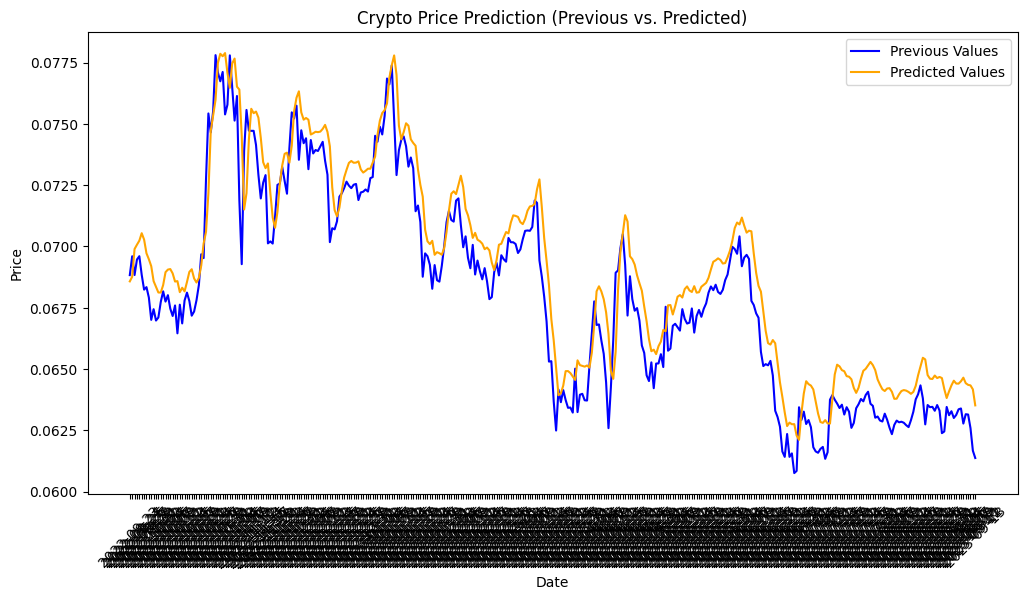

In [94]:
# Plot the historical data with previous values in a suitable color and predicted values in another suitable color
plt.figure(figsize=(12, 6))
plt.plot(dates[-len(y_test):], scaler.inverse_transform(y_test), label='Previous Values', color='blue')
plt.plot(dates[-len(y_test):], predictions, label='Predicted Values', color='orange')
plt.legend()
plt.title('Crypto Price Prediction (Previous vs. Predicted)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.xticks(rotation=45)  # Rotate x-axis labels for readability
plt.show()


ETH-USD


In [98]:
data = pd.read_csv('/content/ETH-USD.csv')

In [99]:
data.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [100]:
data = data.dropna()

In [101]:
prices = data['Close'].values.reshape(-1, 1)

In [102]:
# Normalize the data using Min-Max scaling
scaler = MinMaxScaler()
prices_scaled = scaler.fit_transform(prices)

In [103]:
# Define a function to create sequences for LSTM
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)

In [104]:
# Define a function to create sequences for LSTM
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)

In [105]:
# Define hyperparameters
sequence_length = 10  # Adjust as needed
train_size = int(len(prices_scaled) * 0.8)
test_size = len(prices_scaled) - train_size

In [106]:
# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32)

Epoch 1/50
46/46 [==============================] - 1s 12ms/step - loss: 4.8975e-04
Epoch 2/50
46/46 [==============================] - 1s 15ms/step - loss: 4.7843e-04
Epoch 3/50
46/46 [==============================] - 1s 13ms/step - loss: 4.9187e-04
Epoch 4/50
46/46 [==============================] - 1s 15ms/step - loss: 5.0123e-04
Epoch 5/50
46/46 [==============================] - 0s 10ms/step - loss: 5.1609e-04
Epoch 6/50
46/46 [==============================] - 0s 7ms/step - loss: 4.6144e-04
Epoch 7/50
46/46 [==============================] - 0s 8ms/step - loss: 4.6692e-04
Epoch 8/50
46/46 [==============================] - 0s 8ms/step - loss: 4.6410e-04
Epoch 9/50
46/46 [==============================] - 0s 7ms/step - loss: 4.7148e-04
Epoch 10/50
46/46 [==============================] - 0s 8ms/step - loss: 4.6874e-04
Epoch 11/50
46/46 [==============================] - 0s 9ms/step - loss: 4.7367e-04
Epoch 12/50
46/46 [==============================] - 1s 12ms/step - loss: 4.6048

In [107]:
# Make predictions on the test data
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)

12/12 [==============================] - 0s 9ms/step


In [108]:
# Predict the next 15 days of close prices
next_days_predictions = []
last_sequence = prices_scaled[-sequence_length:].reshape(1, sequence_length, 1)
for _ in range(15):
    next_day_prediction = model.predict(last_sequence)
    next_days_predictions.append(next_day_prediction[0][0])
    last_sequence = np.append(last_sequence[:, 1:, :], next_day_prediction.reshape(1, 1, 1), axis=1)

1/1 [==============================] - 0s 38ms/step


In [109]:
# Create dates for the next 15 days
next_days_dates = pd.date_range(start=dates[-1], periods=16, closed='right')

<ipython-input-109-3d91b5537c10>:2: FutureWarning: Argument `closed` is deprecated in favor of `inclusive`.
  next_days_dates = pd.date_range(start=dates[-1], periods=16, closed='right')


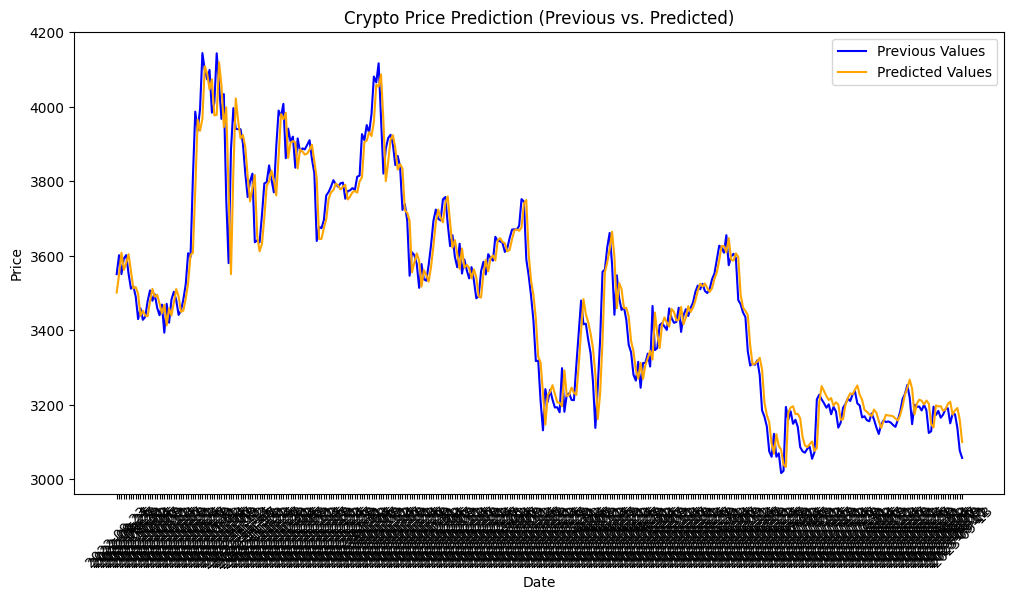

In [110]:
# Plot the historical data with previous values in a suitable color and predicted values in another suitable color
plt.figure(figsize=(12, 6))
plt.plot(dates[-len(y_test):], scaler.inverse_transform(y_test), label='Previous Values', color='blue')
plt.plot(dates[-len(y_test):], predictions, label='Predicted Values', color='orange')
plt.legend()
plt.title('Crypto Price Prediction (Previous vs. Predicted)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.xticks(rotation=45)  # Rotate x-axis labels for readability
plt.show()
